In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs

In [2]:
def check_simialrity(lig1_smile, lig2_smile, radius=2, nBits=1024):
    
    #Mol file from SMILES 
    ligand1 = Chem.MolFromSmiles(lig1_smile)
    ligand2 = Chem.MolFromSmiles(lig2_smile)
    
    #radius = 2  # Adjust the radius as needed, THIS IS FINGERPRINTS

    ligand1_fp = AllChem.GetMorganFingerprintAsBitVect(ligand1, radius, nBits=1024)
    ligand2_fp = AllChem.GetMorganFingerprintAsBitVect(ligand2, radius, nBits=1024)
    
    similarity = DataStructs.TanimotoSimilarity(ligand1_fp, ligand2_fp)
    
    print("Similarity Score:", similarity)
    

In [3]:
check_simialrity("C1CCC2=NC3=CC=CC=C3C(=C2C1)N","CN1CCC23C=CC(CC2OC4=C(C=CC(=C34)C1)OC)O")

Similarity Score: 0.05555555555555555


In [12]:
import pandas as pd

In [13]:
data = pd.read_csv('lox_basic.csv')

In [14]:
data.head(5)

,molecule_chembl_id,canonical_smiles,standard_value,target
0,CHEMBL177598,O=C(Nc1ccc(CCc2ccc(O)c(O)c2)cc1)c1ccc(Cl)cc1O,400.0,active
1,CHEMBL175216,Cc1ccc(C(=O)Nc2ccc(CCc3ccc(O)c(O)c3)cc2)c(O)c1,400.0,active
2,CHEMBL52,CC(Cc1ccc(O)c(O)c1)C(C)Cc1ccc(O)c(O)c1,4900.0,intermediate
3,CHEMBL176728,O=C(Nc1ccc(CCc2ccc(O)c(O)c2)cc1)c1ccc(-c2ccccc...,25000.0,inactive
4,CHEMBL172429,COc1cc(CCc2ccc(NC(=O)c3ccc(C)cc3O)cc2)ccc1O,25000.0,inactive


In [16]:
data_smiles = data.iloc[:,1]

In [17]:
data_smiles

0          O=C(Nc1ccc(CCc2ccc(O)c(O)c2)cc1)c1ccc(Cl)cc1O
1         Cc1ccc(C(=O)Nc2ccc(CCc3ccc(O)c(O)c3)cc2)c(O)c1
2                 CC(Cc1ccc(O)c(O)c1)C(C)Cc1ccc(O)c(O)c1
3      O=C(Nc1ccc(CCc2ccc(O)c(O)c2)cc1)c1ccc(-c2ccccc...
4            COc1cc(CCc2ccc(NC(=O)c3ccc(C)cc3O)cc2)ccc1O
                             ...                        
503                 FC(F)(F)c1ccc(CSc2nccn2-c2ccccc2)cc1
504                       Brc1ccc(CSc2nccn2-c2ccccc2)cc1
505                       CCc1ccc(CSc2nccn2-c2ccccc2)cc1
506    COc1cccc(CNc2ccc(S(=O)(=O)Nc3nc4c(ccc5ccccc54)...
507    CCCCCCCCOC(=O)NS(=O)(=O)Nc1cc(-c2cc3ccccc3[nH]...
Name: canonical_smiles, Length: 508, dtype: object

In [22]:
for i in data_smiles:
    print(i, type(i))

O=C(Nc1ccc(CCc2ccc(O)c(O)c2)cc1)c1ccc(Cl)cc1O <class 'str'>
Cc1ccc(C(=O)Nc2ccc(CCc3ccc(O)c(O)c3)cc2)c(O)c1 <class 'str'>
CC(Cc1ccc(O)c(O)c1)C(C)Cc1ccc(O)c(O)c1 <class 'str'>
O=C(Nc1ccc(CCc2ccc(O)c(O)c2)cc1)c1ccc(-c2ccccc2)cc1O <class 'str'>
COc1cc(CCc2ccc(NC(=O)c3ccc(C)cc3O)cc2)ccc1O <class 'str'>
O=C(O)c1ccccc1-c1cccc(C(=O)Nc2ccc(CCc3ccc(O)c(O)c3)cc2)c1O <class 'str'>
Cc1ccc(C(=O)N(C)c2ccc(CCc3ccc(O)c(O)c3)cc2)c(O)c1 <class 'str'>
O=C(Nc1ccc(CCc2ccc(O)c(O)c2)cc1)c1ccccc1O <class 'str'>
O=C(Nc1ccc(CCCCc2ccc(O)c(O)c2)cc1)c1ccccc1O <class 'str'>
COc1ccc(CCc2ccc(NC(=O)c3ccccc3O)cc2)cc1OC <class 'str'>
O=C(Nc1ccc(CCCc2ccc(O)c(O)c2)cc1)c1ccccc1O <class 'str'>
O=C(Nc1ccc(CCc2ccc(O)c(O)c2)cc1)c1ccc(O)cc1O <class 'str'>
O=C(Nc1ccc(CCc2ccc(O)c(O)c2)cc1)c1cc(Br)ccc1O <class 'str'>
O=C(Nc1ccc(CCc2ccc(O)c(O)c2)cc1)c1cccc(Cl)c1O <class 'str'>
O=C(Nc1ccc(CCc2ccc(O)c(O)c2)cc1)c1ccc2ccccc2c1O <class 'str'>
O=C(O)c1cccc(C(=O)Nc2ccc(CCc3ccc(O)c(O)c3)cc2)c1O <class 'str'>
O=C(Nc1ccc(CCc2ccc(O)c(O)c2)cc1)

In [66]:
def check_simialrity_df(df,radius=2, nBits=1024):
    
    df = list(df)
    
    #Mol file from SMILES 
    ligand1 = Chem.MolFromSmiles(df[0])
    
    
    for i in df[2:]:
        
        ligand2 = Chem.MolFromSmiles(i)
    
    #radius = 2  # Adjust the radius as needed
        ligand1_fp = AllChem.GetMorganFingerprintAsBitVect(ligand1, radius, nBits=1024)
        ligand2_fp = AllChem.GetMorganFingerprintAsBitVect(ligand2, radius, nBits=1024)
    
        similarity = DataStructs.TanimotoSimilarity(ligand1_fp, ligand2_fp)
        print(f"Similarity Score between {ligand1_fp} and {i} ", similarity)
    

In [67]:
check_simialrity_df(df=data_smiles)

Similarity Score between <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x00000242228DFC10> and CC(Cc1ccc(O)c(O)c1)C(C)Cc1ccc(O)c(O)c1  0.30434782608695654
Similarity Score between <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x00000242228DF3C0> and O=C(Nc1ccc(CCc2ccc(O)c(O)c2)cc1)c1ccc(-c2ccccc2)cc1O  0.6808510638297872
Similarity Score between <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x00000242228DFBA0> and COc1cc(CCc2ccc(NC(=O)c3ccc(C)cc3O)cc2)ccc1O  0.5576923076923077
Similarity Score between <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x00000242228DFCF0> and O=C(O)c1ccccc1-c1cccc(C(=O)Nc2ccc(CCc3ccc(O)c(O)c3)cc2)c1O  0.5576923076923077
Similarity Score between <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x00000242228DFC80> and Cc1ccc(C(=O)N(C)c2ccc(CCc3ccc(O)c(O)c3)cc2)c(O)c1  0.42592592592592593
Similarity Score between <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x00000242228DFC10> and O=C(Nc1ccc(

Similarity Score between <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x00000242228DFC80> and CC1(C)CCC[C@]2(C)[C@H]3C=C4C=C(O)C(=O)C=C4O[C@@]3(C)CC[C@@H]12  0.0641025641025641
Similarity Score between <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x00000242228DFC10> and CN1C(N)=N[C@]23CCCN2C(=O)c2cc(Br)c(Br)n2[C@H]13  0.0641025641025641
Similarity Score between <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x00000242228DF3C0> and CC1(C)CCC[C@]2(C)C3=CC4=CC(=O)C(=O)C=C4O[C@@]3(C)CC[C@@H]12  0.04
Similarity Score between <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x00000242228DF820> and CC(C)=CCC[C@@]1(C)CCC[C@]2(C)[C@H](Cc3cc(C(=O)O)ccc3O)C(C)=CC[C@@H]12  0.14457831325301204
Similarity Score between <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x00000242228DFCF0> and C[C@@H](c1cc2ccccc2s1)N(O)C(N)=O  0.1076923076923077
Similarity Score between <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x00000242228DFC80> a

Similarity Score between <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x00000242228DFC80> and CCOC(=O)c1c(CSc2c(C)cc(C)cc2C)n(C)c2ccc(O)cc12  0.11842105263157894
Similarity Score between <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x00000242228DFC10> and COc1cc(/C=C/c2cc(/C=C/c3cc(CC=C(C)C)c(O)c(OC)c3)[nH]n2)cc(CC=C(C)C)c1O  0.0958904109589041
Similarity Score between <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x00000242228DF3C0> and COc1cc(/C=C/C(=O)/C=C(O)/C=C/c2ccc(O)c(OC)c2)ccc1O  0.16129032258064516
Similarity Score between <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x00000242228DF820> and COc1ccc(Cc2sc(-c3ccc(Cl)cc3)nc2O)cc1  0.19047619047619047
Similarity Score between <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x00000242228DFCF0> and CCCCCC(=O)/C=C/C=C\C/C=C\C/C=C\CCCC(=O)O  0.09090909090909091
Similarity Score between <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x00000242228DFC80> and CCCCCC(

Similarity Score between <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x00000242228DFC10> and COc1ccc(O)c(-c2cc(-c3cccc(Br)c3)[nH]n2)c1  0.11428571428571428
Similarity Score between <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x00000242228DF3C0> and COc1ccc(-c2cc(-c3cc(OC)ccc3O)[nH]n2)cc1  0.12903225806451613
Similarity Score between <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x00000242228DF820> and Oc1ccccc1-c1cc(-c2ccccc2)[nH]n1  0.12280701754385964
Similarity Score between <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x00000242228DFBA0> and Oc1ccccc1-c1cc(-c2ccco2)[nH]n1  0.11290322580645161
Similarity Score between <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x00000242228DFC80> and COc1ccc(-c2cc(-c3ccccc3O)[nH]n2)cc1  0.109375
Similarity Score between <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x00000242228DFC10> and Oc1ccccc1-c1cc(-c2ccccc2Cl)[nH]n1  0.15789473684210525
Similarity Score between <rd

In [55]:
dataa = list(data_smiles)

In [62]:
xx = Chem.MolFromSmiles(data_smiles[10])

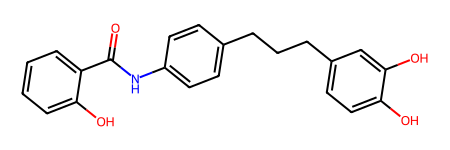

In [63]:
xx

In [23]:
data_smiles[0]

'O=C(Nc1ccc(CCc2ccc(O)c(O)c2)cc1)c1ccc(Cl)cc1O'

In [25]:
type(list(data_smiles))

list

In [27]:
data_smiles[2:]

2                 CC(Cc1ccc(O)c(O)c1)C(C)Cc1ccc(O)c(O)c1
3      O=C(Nc1ccc(CCc2ccc(O)c(O)c2)cc1)c1ccc(-c2ccccc...
4            COc1cc(CCc2ccc(NC(=O)c3ccc(C)cc3O)cc2)ccc1O
5      O=C(O)c1ccccc1-c1cccc(C(=O)Nc2ccc(CCc3ccc(O)c(...
6      Cc1ccc(C(=O)N(C)c2ccc(CCc3ccc(O)c(O)c3)cc2)c(O)c1
                             ...                        
503                 FC(F)(F)c1ccc(CSc2nccn2-c2ccccc2)cc1
504                       Brc1ccc(CSc2nccn2-c2ccccc2)cc1
505                       CCc1ccc(CSc2nccn2-c2ccccc2)cc1
506    COc1cccc(CNc2ccc(S(=O)(=O)Nc3nc4c(ccc5ccccc54)...
507    CCCCCCCCOC(=O)NS(=O)(=O)Nc1cc(-c2cc3ccccc3[nH]...
Name: canonical_smiles, Length: 506, dtype: object

In [34]:
dff = list(data_smiles)

In [35]:
dff[0]

'O=C(Nc1ccc(CCc2ccc(O)c(O)c2)cc1)c1ccc(Cl)cc1O'

In [36]:
dff[2]

'CC(Cc1ccc(O)c(O)c1)C(C)Cc1ccc(O)c(O)c1'

In [39]:
check_simialrity(dff[0],dff[10])

Similarity Score: 0.6444444444444445
